# Importing Libraries

In [ ]:
!pip install tensorflow matplotlib

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Loading and preparing the data

In [2]:
#import dataset and split into train and test
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

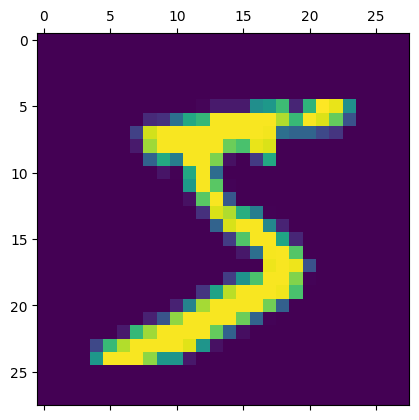

In [3]:
#to see how first image looks
plt.matshow(x_train[0])

In [4]:
#normalising the images by scaling the pixel intensities to the range 0 to 1
x_train = x_train / 255
x_test = x_test / 255

# Creating the Model

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

C:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [7]:
model.compile(optimizer = 'sgd',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Train the Model

In [8]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8367 - loss: 0.6451 - val_accuracy: 0.9026 - val_loss: 0.3549
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9064 - loss: 0.3350 - val_accuracy: 0.9163 - val_loss: 0.2923
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9201 - loss: 0.2860 - val_accuracy: 0.9284 - val_loss: 0.2577
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9280 - loss: 0.2562 - val_accuracy: 0.9339 - val_loss: 0.2359
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9349 - loss: 0.2336 - val_accuracy: 0.9377 - val_loss: 0.2177
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9399 - loss: 0.2151 - val_accuracy: 0.9422 - val_loss: 0.2039
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9441 - loss: 0.1997 - val_accuracy: 0.9461 - val_loss: 0.1890
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9476 - loss: 0.1862 - 

# Evaluate the Model

In [9]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9523 - loss: 0.1628
Loss = 0.163
Accuracy = 0.952


# Making Prediction on New Data

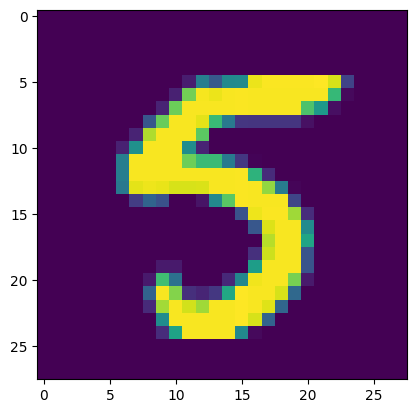

In [10]:
n = random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

# Confusion Matrix

In [11]:
test_predict = model.predict(x_test)
#get classification labels
test_predict_labels = np.argmax(test_predict,axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = test_predict_labels)
print('Confusion Matrix of the Test Set :\n' , confusion_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix of the Test Set :
 tf.Tensor(
[[ 966    0    0    1    0    4    7    1    1    0]
 [   0 1116    3    2    1    1    3    2    7    0]
 [  12    2  963   16    7    1    8   11   11    1]
 [   1    1    6  971    0   11    0    9    9    2]
 [   1    1    6    1  943    0    8    2    2   18]
 [   9    2    1   20    3  830    9    3   10    5]
 [   9    3    2    4    6    8  923    1    2    0]
 [   1    7   15    8    5    2    0  974    2   14]
 [   6    3    4   18    7    8    9    9  907    3]
 [  11    8    1   15   25    5    1    9    4  930]], shape=(10, 10), dtype=int32)
